In [1]:
## jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### Reading the dataset


In [3]:
df = pd.read_csv("spam_ham_dataset.csv")

## Data exploration

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
df.shape,df.ndim

((5171, 4), 2)

In [9]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [10]:
df["label_num"].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

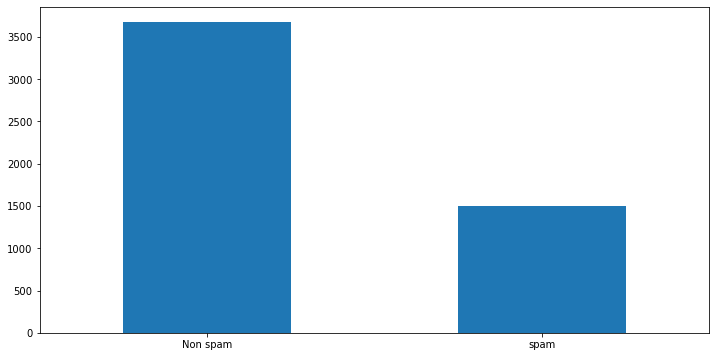

In [11]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Non spam', 'spam'),rotation=0);

In [12]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [13]:
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
        return 0

df['currency_symbol'] = df['text'].apply(currency)

In [14]:
df.head()

,Unnamed: 0,label,text,label_num,currency_symbol
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0


# Cleaning the Text

In [15]:
length = len(df)
length

5171

In [16]:
df.head()

,Unnamed: 0,label,text,label_num,currency_symbol
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,0
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,0


In [17]:
df['text'][1500]

"Subject: can we go over mamie ' s budget today ?\r\nget hard in 60 seconds or less !\r\nenter here .\r\nfor email\r\nremoval ,\r\ngo here .\r\npatentee slow staley month far immovable glory alive kronecker pax doleful opulent .\r\ncrs international exports inc\r\nsouth tank st . # 9633 belize city , belize\r\ncoed bobolink avenue amazon derive federal correct lengthwise lyricism vito deductible divine labour decile threw manipulable breadth cord culver pigging revulsion discern brahmsian rune doom papaw .\r\n"

In [ ]:
import re
corpus = []
for i in range(0,length):
    text = re.sub("[^a-zA-Z]"," ",str(df["text"][i]))
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)
print(corpus)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

In [ ]:
import pickle
pickle.dump(cv, open('cv.pkl', 'wb'))

In [ ]:
y = df["label_num"].values
y

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred[:20],y_test[:20]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

In [ ]:
import pickle

# Save trained model to file
pickle.dump(model, open("spam.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("spam.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

In [ ]:
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("SPAM")
else :
    print("NOT SPAM")

Testing Examples :
NOT SPAM :
```
Hi Scott,
Thanks for the e-mail.　 It is always nice to hear from people, especially
from you, Scott.

I have not got any reply, a positive or negative one, from Seibido yet.
Let's wait and hope that it will make a BOOK.

Have you finished your paperwork for Kaken and writing academic articles?
If you have some free time in the near future, I want to meet you and
explain to you our next project.　

Why not drink out in Hiroshima if we are accepted?
We need to celebrate ourselves, don't we?　
Let's have a small end-of-the-year party!
```
SPAM :
```
What's New In August 2020 [News & Updates]
```